In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")

# An Analysis of the Data Science Industry in the United States

## Read in Data

In [3]:
survey = pd.read_csv("kaggle_survey_2020_responses.csv")

C:\Users\Matthew\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
survey = survey.iloc[1:, :]

In [5]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# check spellings
print(survey["Q3"].unique())
print("\n")
print(survey["Q5"].unique())

['Colombia' 'United States of America' 'Argentina' 'Japan' 'India'
 'Brazil' 'China' 'Germany' 'Indonesia' 'Canada' 'Switzerland' 'Other'
 'Singapore' 'Russia' 'South Africa' 'Egypt' 'Netherlands' 'Pakistan'
 'Nepal' 'South Korea' 'Poland' 'Belarus' 'Tunisia' 'Ukraine' 'Belgium'
 'Saudi Arabia' 'Taiwan' 'Nigeria' 'Italy' 'Spain' 'United Arab Emirates'
 'Mexico' 'Viet Nam' 'Thailand'
 'United Kingdom of Great Britain and Northern Ireland' 'France' 'Ghana'
 'Ireland' 'Philippines' 'Morocco' 'Turkey' 'Iran, Islamic Republic of...'
 'Peru' 'Romania' 'Republic of Korea' 'Australia' 'Chile' 'Kenya' 'Sweden'
 'Bangladesh' 'Greece' 'Malaysia' 'Portugal' 'Israel' 'Sri Lanka']


['Student' 'Data Engineer' 'Software Engineer' 'Data Scientist'
 'Data Analyst' 'Research Scientist' 'Other' 'Currently not employed'
 'Statistician' 'Product/Project Manager' 'Machine Learning Engineer' nan
 'Business Analyst' 'DBA/Database Engineer']


In [7]:
us_data = survey[survey["Q3"] == "United States of America"]

In [8]:
us_data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,571,50-54,Man,United States of America,Master’s degree,Software Engineer,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
26,723,25-29,Woman,United States of America,Master’s degree,Student,1-2 years,Python,R,NaN,...,Weights & Biases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("There are {} people that responded to the survey from the United States".format(len(us_data)))

There are 2237 people that responded to the survey from the United States


## Age and Gender of Survey Respondents

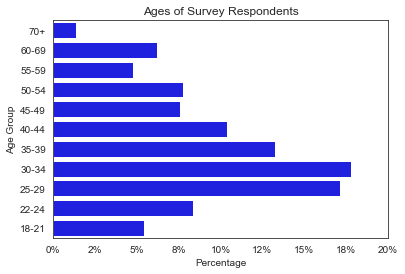

In [10]:
ages = us_data["Q1"].value_counts(normalize = True)
ages_df = pd.DataFrame({"Ages": ages.index, "Percent": ages.values})

sns.barplot(x = "Percent", y = "Ages", data = ages_df, order = ["70+", "60-69", "55-59", "50-54", "45-49", "40-44", "35-39", "30-34", "25-29", "22-24", "18-21"],
           color = "blue")

plt.title("Ages of Survey Respondents")
plt.ylabel("Age Group")
plt.xlabel("Percentage")
plt.xlim(0, .20)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0%}'))

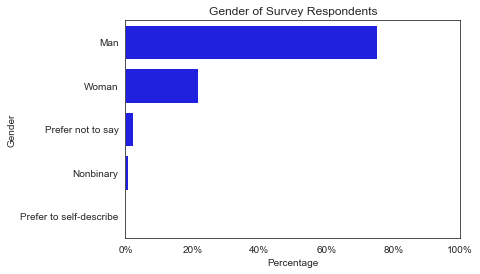

In [11]:
gender = us_data["Q2"].value_counts(normalize = True)
gender_df = pd.DataFrame({"Gender": gender.index, "Percent": gender.values})

sns.barplot(x = "Percent", y = "Gender", data = gender_df, color = "blue")

plt.title("Gender of Survey Respondents")
plt.ylabel("Gender")
plt.xlabel("Percentage")
plt.xlim(0, 1)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0%}'))

Most respondents to the survey in the United States seem to be in their late 20's or early 30's. There is also a large majority of men who completed the survey. It might be interesting to see what the percentage is of each gender that completed the survey in each age group to see if we can spot any trends.

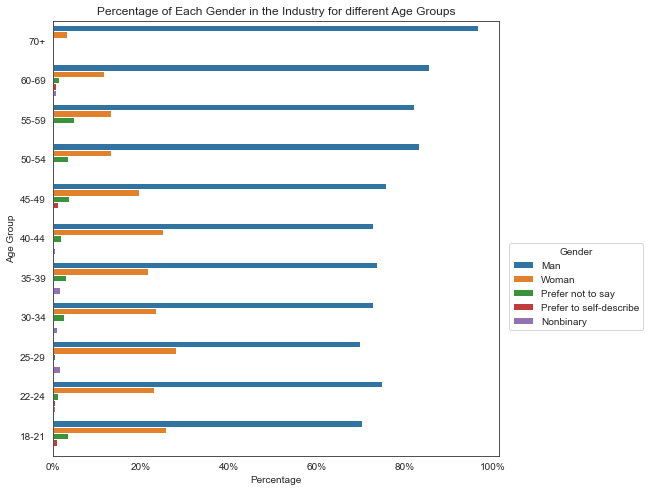

In [12]:
age_and_gender_df = pd.DataFrame(us_data.groupby("Q1")["Q2"].value_counts(normalize = True))
age_and_gender_df = age_and_gender_df.rename(columns = {"Q2": "Percent"}).reset_index()

plt.figure(figsize = (8, 8))
sns.barplot(x = "Percent", y = "Q1", hue = "Q2", data = age_and_gender_df, order = ["70+", "60-69", "55-59", "50-54", "45-49", "40-44", "35-39", "30-34", "25-29", "22-24", "18-21"])
plt.legend(bbox_to_anchor = (1.01, .5), title = "Gender")
plt.title("Percentage of Each Gender in the Industry for different Age Groups")
plt.xlabel("Percentage")
plt.ylabel("Age Group")

plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0%}'))

For each age group, a majority of respondents to the survey are men. This could perhaps be a consquence of a lack of diversity in the data science industry in the United States. However, it looks like the percentage of men in each age group is decreasing with younger age groups, while the percentage of women is increasing. Other genders still have very low representation in each age group. This is perhaps a sign that representation of other genders besides men is increasing in the data science industry, albeit at a slow pace.

## Income, Gender, and Age

In [13]:
def update_values(data, column, dictionary):
    """
    Data is the dataframe being manipulated
    Column is the column in the data that will be changed
    Dicitonary is the dictionary to map new values to
    This function allows you to take a column of values and map them to new values that are defined in a user created dictionary
    """
    for key in dictionary.keys():
        data[column].replace(key, dictionary[key], inplace = True)
    return data

In [14]:
value_dict = {"$0-999": "0-99,999", "1,000-1,999": "0-99,999", "2,000-2,999": "0-99,999", "3,000-3,999": "0-99,999", "4,000-4,999": "0-99,999", "5,000-7,499": "0-99,999",
              "7,500-9,999": "0-99,999", "10,000-14,999": "0-99,999", "15,000-19,999": "0-99,999", "20,000-24,999": "0-99,999", "25,000-29,999": "0-99,999", 
              "30,000-39,999": "0-99,999", "40,000-49,999": "0-99,999", "50,000-59,999": "0-99,999", "60,000-69,999": "0-99,999", "70,000-79,999": "0-99,999", "80,000-89,999": 
              "0-99,999", "90,000-99,999": "0-99,999", "100,000-124,999": "100,000-199,999", "125,000-149,999": "100,000-199,999", "150,000-199,999": "100,000-199,999",
              "200,000-249,999": "200,000-299,999", "250,000-299,999": "200,000-299,999", "300,000-500,000": "300,000-500,000", "> $500,000": "More than 500,000"}

In [15]:
# Remove students and people who are currently not employed for analysis
no_student_or_unemployed_df = us_data[(us_data["Q5"] != 'Student') & (us_data["Q5"] != "Currently not employed")]
no_student_or_unemployed_df = update_values(no_student_or_unemployed_df, "Q24", value_dict)

C:\Users\Matthew\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


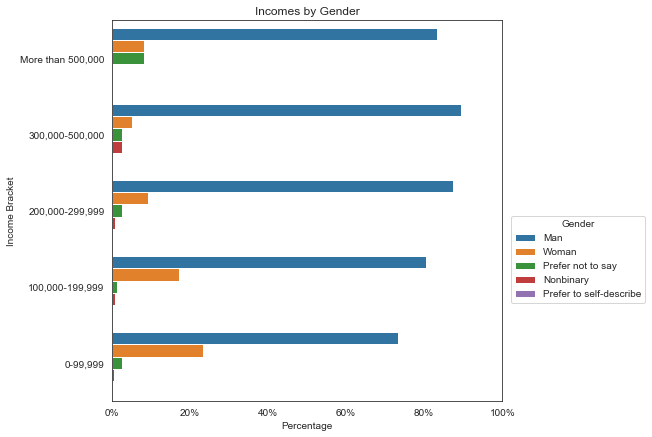

In [16]:
income_df = pd.DataFrame(no_student_or_unemployed_df.groupby(["Q24"])["Q2"].value_counts(normalize = True))
income_df = income_df.rename(columns = {"Q2": "Percent"}).reset_index()

plt.figure(figsize = (7, 7))
sns.barplot(x = "Percent", y = "Q24", hue = "Q2", data = income_df, order = ["More than 500,000", "300,000-500,000", "200,000-299,999", "100,000-199,999", "0-99,999"])

plt.title("Incomes by Gender")
plt.xlabel("Percentage")
plt.ylabel("Income Bracket")
plt.legend(bbox_to_anchor = (1.01, .5), title = "Gender")
plt.xlim(0, 1)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0%}'))

Men seem to have almost a complete majority of the higher paying jobs in the industry. There is a clear decrease in the percentage of men in an income bracket as the income drops, and a clear increase in the percentage of woman working in a specific income bracket as income drops.

## Gender and Job Title

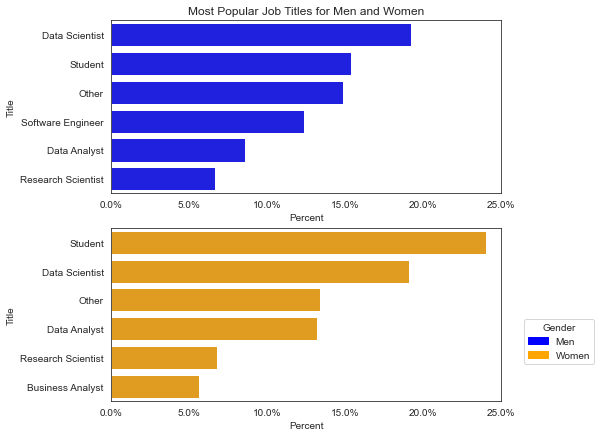

In [17]:
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (7, 7))

men_data = us_data[(us_data["Q2"] == "Man") & (us_data["Q5"] != "Currently not employed")]
men_data = men_data["Q5"].value_counts(normalize = True)
men_data = pd.DataFrame({"Job Title": men_data.index, "Percent": men_data.values * 100}).head(6)
women_data = us_data[(us_data["Q2"] == "Woman") & (us_data["Q5"] != "Currently not employed")]
women_data = women_data["Q5"].value_counts(normalize = True)
women_data = pd.DataFrame({"Job Title": women_data.index, "Percent": women_data.values * 100}).head(6)

sns.barplot(y = "Job Title", x = "Percent", data = men_data, ax = ax0, color = "blue")
sns.barplot(y = "Job Title", x = "Percent", data = women_data, ax = ax1, color = "orange")

blue_patch = mpatches.Patch(color = "blue", label = "Men")
orange_patch = mpatches.Patch(color = "orange", label = "Women")
plt.legend(handles = [blue_patch, orange_patch], bbox_to_anchor = (1.25, .5), title = "Gender")

plt.title("Most Popular Job Titles for Men and Women", y = 2.2)

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())

for ax in fig.axes:
    ax.set_ylabel("Title")
    ax.set_xlim(0, 25)

The most popular job titles for both men and women are extremely similiar. The top 3 for both men and women are data scientist, student and other. Data analyst and research scientist are also both in the top 6 most popular job titles for men and women. With mostly the same job titles, it is curious as to why there is such a big difference in pay between men and women. Perhaps showing signs of a wage gap, but it is still necessary to take into account that student is a much more popular title for women than for men, which likely plays at least a small role in the wage gap shown by this survey, as students are much more likely to make less money. The title "Other" is also ambiguous and does not give us much information as to what the job is. We can also take a look at education to see if there are differences in education between men and women, which might help to explain the wage gap.

## Gender and Education

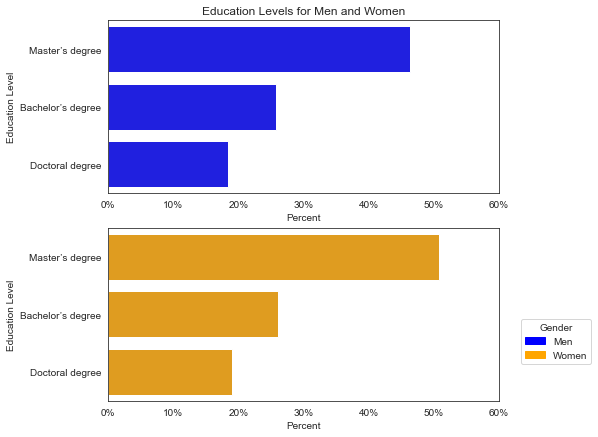

In [18]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (7, 7))

men_data = us_data[us_data["Q2"] == "Man"]
men_data = men_data["Q4"].value_counts(normalize = True)
men_data = pd.DataFrame({"Education Level": men_data.index, "Percent": men_data.values * 100}).head(3)
women_data = us_data[us_data["Q2"] == "Woman"]
women_data = women_data["Q4"].value_counts(normalize = True)
women_data = pd.DataFrame({"Education Level": women_data.index, "Percent": women_data.values * 100}).head(3)

sns.barplot(y = "Education Level", x = "Percent", data = men_data, ax = ax0, color = "blue")
sns.barplot(y = "Education Level", x = "Percent", data = women_data, ax = ax1, color = "orange")

blue_patch = mpatches.Patch(color = "blue", label = "Men")
orange_patch = mpatches.Patch(color = "orange", label = "Women")
plt.legend(handles = [blue_patch, orange_patch], bbox_to_anchor = (1.25, .5), title = "Gender")

plt.title("Education Levels for Men and Women", y = 2.2)

for ax in fig.axes:
    ax.set_ylabel("Education Level")
    ax.set_xlim(0, 60)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())

The percentages of both men and women that have graduated with a bachelor's or doctoral degree are relatively the same. However, looking at Master's degrees, there is clearly a higher percentage of women who have obtained Master's degrees then men. This does not support the idea that lack of education contributes to the wage gap seen previously.

## Gender and Experience

<ipython-input-19-ef59b77d7653>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data["Q6"] = question_6


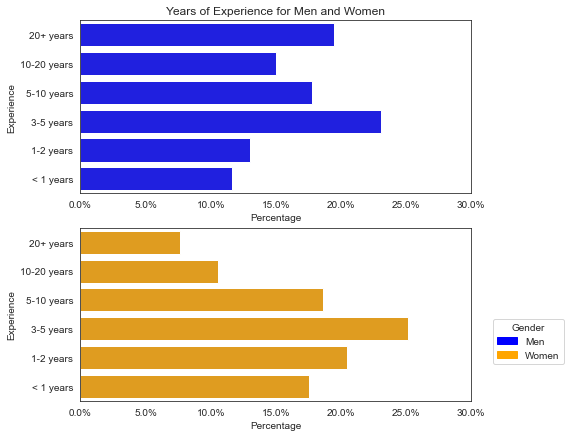

In [19]:
question_6 = []
for i in range(us_data.shape[0]):
    if us_data.iloc[i, 6] == "I have never written code":
        question_6.append("< 1 years")
    else:
        question_6.append(us_data.iloc[i, 6])
us_data["Q6"] = question_6

experience_df = pd.DataFrame(us_data.groupby("Q2")["Q6"].value_counts(normalize = True))
experience_df.rename(columns = {"Q6": "Percent"}, inplace = True)
experience_df["Percent"] = experience_df["Percent"] * 100
experience_df.reset_index(inplace = True)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (7, 7))

mens_experience = experience_df[experience_df["Q2"] == "Man"]
womens_experience = experience_df[experience_df["Q2"] == "Woman"]

sns.barplot(x = "Percent", y = "Q6", data = mens_experience, ax = ax0, color = "blue", order = ["20+ years", "10-20 years", "5-10 years", "3-5 years", "1-2 years", "< 1 years"])
sns.barplot(x = "Percent", y = "Q6", data = womens_experience, ax = ax1, color = "orange", order = ["20+ years", "10-20 years", "5-10 years", "3-5 years", "1-2 years", "< 1 years"])

plt.legend(handles = [blue_patch, orange_patch], bbox_to_anchor = (1.25, .5), title = "Gender") # blue_patch and orange_patch are defined in previous graph
plt.title("Years of Experience for Men and Women", y = 2.2)

for ax in fig.axes:
    ax.set_ylabel("Experience")
    ax.set_xlabel("Percentage")
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_xlim(0, 30)

Men seem to have more experience programming them women do based on this survey. This could play a factor into why men recieve more pay than woman, but it likely does not make a big difference since there are still a large percentage of women with a good amount of coding experience.

# Conclusion

Overall, we can conclude that the data science industry in the United States is mainly dominated by men. Although it seems like other genders might be making a breakthrough into the industry, it does not look like there will be a significant rush of other genders taking data science positions any time soon. We also explored the posibility of a wage gap, and saw that with similar job titles, and equivalent or more education than men, women make less then men do in this industry. Even with the advantage of more coding experience for men over women, this should not have such a large affect on income like was shown in this analysis. In a field that is open to the possibility of bias from things such as AI algorithms, it is important to have a diverse workforce so that everyone is represented. Corporations and universities needs to do a better job at accepting other genders into the field in order to improve diversity in the industry.